<a href="https://colab.research.google.com/github/Toto17515/KKU_Project/blob/Data/Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [ ]:
#Basic
import math
import decimal
import statsmodels
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import combinations
from math import isnan, nan
from datetime import datetime 

#Parameter

##Maximize

In [ ]:
#EMA Indicator
def EMAIndicator(Close, A):
  if A > 1 and len(Close) > 1:
    EMA = []
    for a in range(A-1):
      EMA.append(float('NaN'))
    alpha = 2/(A+1)
    ws = 0
    wc = 0
    for b in range(A):
      ws = ws + Close[b]*(1-alpha)**b
      wc = wc + (1-alpha)**b
    EMA.append(ws/wc)
    for c in range(len(Close)-A):
      EMA.append(EMA[c+A-1]+alpha*(Close[c+A]-EMA[c+A-1]))
    return EMA
  else:
    return print('error')  

In [ ]:
#PSAR Indicator
def PSARIndicator(High, Low):
  sar = [float('NaN'),float('NaN')]
  psar_trend = ['Sideway', 'Sideway']
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        psar_trend.append('Sideway')  
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend.append('Up')
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF <= 0.20: AF += 0.02
        else: 
          sar.append(h)
          psar_trend.append('Down')
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend.append('Down')
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF <= 0.20: AF += 0.02
        else: 
          sar.append(l)
          psar_trend.append('Up')
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]     
    return psar_trend
  else:
    return print('error')  

In [ ]:
#RSI Indicator
def RSIIndicator(Close, B):
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(B):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  UpAVG.append(sum(Up[:B])/len(Up[:B]))
  DownAVG.append(sum(Down[:B])/len(Down[:B]))
  for k in range(len(Diff)-B):
    UpAVG.append((UpAVG[k]*(B-1)+Up[k+B])/B)
    DownAVG.append((DownAVG[k]*(B-1)+Down[k+B])/B)
  for l in range(len(UpAVG)):
    RSI.append(100-100/(1+(UpAVG[l]/DownAVG[l])))
  return RSI

In [ ]:
#WPR Indicator
def WPRIndicator(High, Low, Close, C):
  WPR = []; 
  for a in range(C-1):
     WPR.append(float('NaN'))
  for i in range(len(Close)):
    if i >= C-1: 
      Highest = max(High[i-C+1:i+1]) 
      Lowest = min(Low[i-C+1:i+1])
      WPR.append((Close[i]-Highest)/(Highest-Lowest)*100)
  return WPR

In [ ]:
#logic #ปรับ
def parameter(Y1, Y2, Y3, A, B, C):
  Trend = []
  ema = EMAIndicator(Y3, A); ema_trend = []
  for i in range(len(ema)):
    if Y3[i] > ema[i]: ema_trend.append('Up')
    elif Y3[i] < ema[i]: ema_trend.append('Down')
    else: ema_trend.append('Sideway')
  psar_trend = PSARIndicator(Y1, Y2)
  rsi = RSIIndicator(Y3, B); rsi_trend = []
  for j in range(len(rsi)):
    if rsi[i] > 50 : rsi_trend.append('Up')
    elif rsi[j] < 50: rsi_trend.append('Down')
    else: rsi_trend.append('Sideway')
  wpr = WPRIndicator(Y1, Y2, Y3, C); wpr_trend = []
  for k in range(len(wpr)):
    if wpr[k] > -50: wpr_trend.append('Up')
    elif wpr[k] < -50: wpr_trend.append('Down')
    else: wpr_trend.append('Sideway')
  for l in range(len(Y3)):
    if ema_trend[l] == psar_trend[l] == rsi_trend[l] == wpr_trend[l]: 
      Trend.append(ema_trend[l])
    else: Trend.append('Sideway')
  Real = ['Sideway']
  for m in range(len(Y3)):
    if m > 0:
      if Y3[m] > Y3[m-1]:
        Real.append('Up')
      elif Y3[m] < Y3[m-1]:
        Real.append('Down')
      else:
        Real.append('Sideway')
  T = 0; N = 0
  for n in range(len(Trend)):
    if Trend[n] != 'Sideway':
      N+=1
      if Real[n] == Trend[n]: T+=1
  if N == 0: return 0
  else: return T/N*100

In [ ]:
def Maximize(FOREX_High, FOREX_Low,FOREX_Close, listA, listB, listC):
  MAX = {}
  Y1 = FOREX_High.values.tolist(); Y2 = FOREX_Low.values.tolist(); Y3 = FOREX_Close.values.tolist()
  for a in listA:
    text1 = str('Parameter values ')
    text2 = str(', A = ') + str(a)
    for b in listB:
      text3 = str(', B = ') + str(b)
      for c in listC: 
        text4 = str(' and C = ') + str(c)
        precision = parameter(Y1, Y2, Y3, a, b, c)
        text5 = str(' give a maximum precision of ') + str(precision) + str(' %.')
        MAX[precision] = text1+text2+text3+text4+text5
  return print(MAX[max(MAX.keys())])                   


#Algorithm

##Sub Function

###Indicator

In [ ]:
#EMA
def EMA(Close, A):
  Close = Close.tolist()
  if len(Close) > A-1:
    EMA = []; ws = 0; wc = 0
    for a in range(A-1):
      EMA.append(float('NaN'))
    alpha = 2/(A+1)
    for b in range(A):
      ws = ws + Close[b]*(1-alpha)**b
      wc = wc + (1-alpha)**b
    EMA.append(ws/wc)
    for c in range(len(Close)-A):
      EMA.append(EMA[c+A-1]+alpha*(Close[c+A]-EMA[c+A-1]))
    if Close[len(Close)-1] > EMA[-1]: return 'Up'
    elif Close[len(Close)-1] < EMA[-1]: return 'Down'
    else: return 'Sideway'

In [ ]:
#PSAR
def PSAR(High, Low):
  High = High.tolist()
  Low = Low.tolist()
  sar = [float('NaN'),float('NaN')]
  direction = 'None'; h = 0; k = 0; d = 2; AF = 0.02
  if len(High) == len(Low) and len(High)> 2:
    #Begin
    for i in range(len(High)-1):
      if (High[i+1] > High[i] and Low[i+1] < Low[i]) or (High[i+1] < High[i] and Low[i+1] > Low[i]):
        direction = 'Sideway'
        sar.append(float('NaN'))
        d += 1
      elif  High[i+1] > High[i]:
        direction = 'Up'
        h = max(High[:i+d+1])
        sar.append(min(Low[:i+1])); break
      else:
        direction = 'Down'
        l = min(Low[:i+d+1])
        sar.append(max(High[:i+1])); break
    #PSAR
    for j in range(len(High)-d):
      if direction == 'Up':
        psar = sar[j+d]+AF*(h-sar[j+d])
        if Low[j+d] > psar: 
          sar.append(psar)
          psar_trend = 'Up'
          direction = 'Up'
          if j < len(High)-d-1:
            if h < High[j+d+1]: 
              h = High[j+d+1]
              if AF <= 0.20: AF += 0.02
        else: 
          sar.append(h)
          psar_trend = 'Down'
          direction = 'Down'
          AF = 0.02
          if j < len(High)-d-1: l = Low[j+d+1]
      else:
        psar = sar[j+d]-AF*(sar[j+d]-l)
        if High[j+d] < psar: 
          sar.append(psar)
          psar_trend = 'Down'
          direction = 'Down'
          if j < len(Low)-d-1:
            if l > Low[j+d+1]: 
              l = Low[j+d+1]
              if AF <= 0.20: AF += 0.02
        else: 
          sar.append(l)
          psar_trend ='Up'
          direction = 'Up'
          AF = 0.02   
          if j < len(Low)-d-1: h = High[j+d+1]     
    return psar_trend

In [ ]:
#RSI
def RSI(Close, B):
  Close = Close.tolist()
  Diff = []; Up = []; Down = []; 
  UpAVG = []; DownAVG = []; RSI = []; 
  for a in range(B):
    RSI.append(float('NaN'))
  for i in range(len(Close)):
    if i > 0: Diff.append(Close[i]-Close[i-1])
  for j in range(len(Diff)):
    if Diff[j] > 0:
      Up.append(Diff[j])
      Down.append(0)
    elif Diff[j] < 0:
      Up.append(0)
      Down.append(-Diff[j])
    else:
      Up.append(0)
      Down.append(0)
  UpAVG.append(sum(Up[:B])/len(Up[:B]))
  DownAVG.append(sum(Down[:B])/len(Down[:B]))
  for k in range(len(Diff)-B):
    UpAVG.append((UpAVG[k]*(B-1)+Up[k+B])/B)
    DownAVG.append((DownAVG[k]*(B-1)+Down[k+B])/B)
  for l in range(len(UpAVG)):
    if DownAVG[l] != 0:
      RSI.append(100-100/(1+(UpAVG[l]/DownAVG[l])))
    else: RSI.append(100)
  if RSI[-1] > 50: return 'Up'
  elif RSI[-1] < 50: return 'Down'
  else: return 'Sideway'

In [ ]:
#WPR
def WPR(High, Low, Close, C):
  High = High.tolist()
  Low = Low.tolist()
  Close = Close.tolist()
  Highest = max(High[-C:]) 
  Lowest = min(Low[-C:])
  WPR= (Close[len(Close)-1]-Highest)/(Highest-Lowest)*100
  if WPR > -50: return 'Up'
  elif WPR < -50: return 'Down'
  else: return 'Sideway' 

###Seasonal

In [ ]:
#ความยาวฤดูกาล
def Length_Seasonal(data, freq):
  SeasonalDecompose = statsmodels.tsa.seasonal.seasonal_decompose(data, freq=freq).seasonal
  LowSeasonal = []
  for i in SeasonalDecompose:
    if i <= min(SeasonalDecompose)+(max(SeasonalDecompose)-min(SeasonalDecompose))/5:
      LowSeasonal.append(i)
    else: LowSeasonal.append(float('NaN'))
  MinSeasonal = []
  MIN = {}
  for i in range(len(LowSeasonal)):
    if not isnan(LowSeasonal[i]): MIN[LowSeasonal[i]] = i+1
    else:
        if MIN:
          MinSeasonal.append(MIN)
          MIN = {}
  indexLength = []
  for i in MinSeasonal: 
    indexLength.append(i[min(i)])
  Length = []
  for i in range(len(indexLength)):
    if i > 0: Length.append(abs(indexLength[i]-indexLength[i-1]))
  s = round((sum(Length)/len(Length)))
  if len(Length) == 0 : return 0
  else: 
    if s < 260: return s
    else: return 0

###Order

In [ ]:
#check function
def function(data):
  x = []; y = []
  for i in range(math.floor(len(data)/10)):
    if i  > 0:
      x.append(i)
      y.append(data[i])
  if y:
    def EXP(x,a,b,c):
      return a**x+b*x+c
    def SIN(x,a,b,c):
      return a*np.sin(x)/x+b*x+c
    exp = curve_fit(EXP, x, y)
    sin = curve_fit(SIN, x, y)
    e = round(exp[0][0],2)
    if e == 1: e = 0
    s = round(sin[0][0],2)
    if round(sin[0][0]) != 0  and round(sin[0][1]) != 0: s = 0
    if e == 0 and s == 0: return False
    else: return True
  else: return False

In [ ]:
x = []
for i in range(65):
  x.append(i)

In [ ]:
from numpy.random.mtrand import randint
y = []
for i in x:
  y.append(((0.5**i)+randint(0,1)))

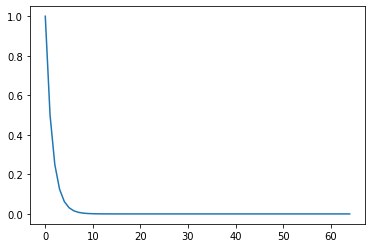

In [ ]:
plt.plot(x,y)

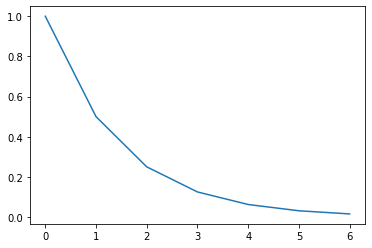

In [ ]:
plt.plot(x[:7],y[:7])

In [ ]:
function(y)

True

In [ ]:
#แปลงข้อมูลให้ Stationary (i(D))
def found_D(data, s):
  if s != 0:
    data_s = []
    for i in range(len(data)):
      if s*(i+1)-1 <= len(data)-1:
        data_s.append(data.values.tolist()[s*(i+1)-1])
    p_value = sm.tsa.stattools.adfuller(data_s)[1]
    D = 0
    while (p_value >= 0.05):
      D+=1
      data = data.diff(s).dropna()
      data_s = []
      for i in range(len(data)):
        if s*(i+1)-1 <= len(data)-1:
          data_s.append(data.values.tolist()[s*(i+1)-1])
      p_value = sm.tsa.stattools.adfuller(data_s)[1]
    return  D
  else: return 0

In [ ]:
#แปลงข้อมูลให้ Stationary (i(d))
def found_d(data):
  p_value = sm.tsa.stattools.adfuller(data)[1]
  d = 1
  while (p_value >= 0.05):
    d+=1
    data = data.diff(1).dropna()
    p_value = sm.tsa.stattools.adfuller(data)[1]
  return d

In [ ]:
#หา Autoregressive process of order p:
def found_p(data,s):
  p = []
  if s == 0: s = len(data)/4 -1
  acf = sm.graphics.tsa.acf(data, nlags= math.floor(len(data)/4))
  if function(acf):
    pacf = sm.graphics.tsa.pacf(data, nlags= math.floor(len(data)/4))
    for i in range(len(pacf)):
      if i != 0 and i < 5:
        if pacf[i] > 2/math.sqrt(len(pacf)):
          if i <= s: p.append(i)
        if pacf[i] < -2/math.sqrt(len(pacf)):
          if i  <= s: p.append(i)
  if p == []: p = [0]
  return p

In [ ]:
#หา Autoregressive process of order P 
def found_P(data, s):
  P = []; S_acf = []
  if s != 0:
    acf = sm.graphics.tsa.acf(data, nlags= math.floor(len(data)/4))
    for i in [1,2,3]:
      if s*(i+1) <= len(acf) and i != 0:
        S_acf.append([s*i])
    if function(S_acf):
      pacf = sm.graphics.tsa.pacf(data, nlags= math.floor(len(data)/4))
      for i in range(len(pacf)):
        if s*(i+1) <= len(pacf) and i != 0 and i < 5:
          if pacf[s*i] > 2/math.sqrt(len(pacf)):
            P.append(i)
          if pacf[s*i] < -2/math.sqrt(len(pacf)):
            P.append(i)
  if P == []: P = [0]
  return P

In [ ]:
#หา Moving Average Process of order q
def found_q(data, s):
  q = []
  if s == 0: s = len(data)/4
  pacf = sm.graphics.tsa.pacf(data, nlags= math.floor(len(data)/4))
  if function(pacf):
    acf = sm.graphics.tsa.acf(data, nlags= math.floor(len(data)/4))
    for i in range(len(pacf)):
      if i != 0 and i < 5:
        if pacf[i] > 2/math.sqrt(len(pacf)):
          if i <= s: q.append(i)
        if pacf[i] < -2/math.sqrt(len(data)):
          if i  <= s: q.append(i)
  if q == []: q = [0]
  return q

In [ ]:
#หา Moving Average Process of order Q
def found_Q(data,s):
  Q = []; S_pacf = []
  if s != 0:
    pacf = sm.graphics.tsa.pacf(data, nlags= math.floor(len(data)/4))
    for i in range(len(pacf)):
      if s*(i+1) <= len(pacf) and i != 0:
        S_pacf.append([s*i])
    if function(S_pacf):
      acf = sm.graphics.tsa.acf(data)
      for i in range(len(acf)):
        if s*(i+1) <= len(acf) and i != 0 and i < 5:
          if acf[s*i] > 2/math.sqrt(len(data)):
            Q.append(i)
          if acf[s*i] < -2/math.sqrt(len(data)):
            Q.append(i)
  if Q == []: Q = [0]
  return Q

In [ ]:
# set order arimax
def order_arimax(data, s, d):
  orders = []
  p = found_p(data, s)
  q = found_q(data, s)
  for i in p:
    for j in q:
      orders.append([i,d,j])
  return orders

In [ ]:
# set order sarimax
def order_sarimax(data, s, D):
  orders = []
  P = found_P(data, s)
  Q = found_Q(data, s)
  for i in P:
    for j in Q:
      orders.append([i,D,j,s])
  return orders

In [ ]:
#set Order
def order(y, freq):
  o = []
  s = Length_Seasonal(y,freq)
  y = np.log(y).dropna()
  d = found_d(y)
  if d != 0: 
    for i in range(d):
      y =y.diff(1).dropna()
  D = found_D(y, s)
  if D != 0: 
    for i in range(D):
      y = y.diff(s).dropna() 
  oa = order_arimax(y, s, d)
  os = order_sarimax(y, s, D)
  for I in oa:
    for J in os:
      o.append([I,J])
  return o

###Adjust

In [ ]:
#หา B
def B(r,p):
  b_sum = 0
  for i in range(len(r)-1):
    if r[i] < p[i+1]: 
      if r[i+1] >= r[i]: b_sum += p[i+1]-r[i]
  return b_sum/(len(r)-1)

In [ ]:
#หา A
def A(r,p):
  a_sum = 0
  for i in range(len(r)-1):
    if r[i] > p[i+1]: 
      if r[i+1] <= r[i]: a_sum += p[i+1]-r[i]
  return a_sum/(len(r)-1)

###Precision

In [ ]:
#Precision
def precision(y,x,order_arimax,order_sarimax):
  model = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=y,order=order_arimax,seasonal_order=order_sarimax,initialization='approximate_diffuse').fit()
  n = len(y); r = y[:n-1].values; p = model.predict(1,n-1).values
  T = 0; N = 0
  a = A(r,p); b = B(r,p)
  for i in range(len(r)-1):
    if p[i+1] > r[i]: 
      if p[i+1] + a > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
    if p[i+1] < r[i]: 
      if p[i+1] + b > r[i]:
        if r[i+1] > r[i] : T+=1; N+=1
        else: N+=1
  return [T/N,a,b]

##Main Function

In [ ]:
#Indicator
def Indicator_Algorithm(FOREX_High, FOREX_Low, FOREX_Close, A, B, C):
  Y1 = FOREX_High; Y2 = FOREX_Low; Y3 = FOREX_Close
  Indicator = 'None'
  if len(Y1) == len(Y2) == len(Y3):  
    if EMA(Y3,A) == PSAR(Y1,Y2) == RSI(Y3,B) == WPR(Y1,Y2,Y3,C): Indicator = EMA(Y3,A)
    else: Indicator = 'Sideway'
    return Indicator
  else: return 'The data size must be the same.'

In [ ]:
#SARIMAX
def SARIMAX_Algorithm(FOREX_High, FOREX_Low,FOREX_Close, 
                      XAUUSD_Close, WTIUSD_Close, STOCK1_Close, STOCK2_Close,freq = 20):
  if len(FOREX_Close) >= 32:  
    Y1 = FOREX_High.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y2 = FOREX_Low.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y3 = FOREX_Close.reset_index(drop=True).drop(0).reset_index(drop=True)
    X1 = XAUUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X2 = WTIUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X3 = STOCK1_Close.reset_index(drop=True).drop(len(STOCK1_Close)-1).reset_index(drop=True)
    X4 = STOCK2_Close.reset_index(drop=True).drop(len(STOCK2_Close)-1).reset_index(drop=True)
    x =   inde_variable = pd.DataFrame({'X1':X1,'X2':X2,'X3':X3,'X4':X4})
    SARIMAX = 'None'
    if len(Y1) == len(Y2) == len(Y3) == len(X1) == len(X2) == len(X3) == len(X4):  
      for i in order(Y3, freq):
        Max = {}
        prec = precision(Y3, x, i[0],i[1])
        Max[prec[0]] = [i[0], i[1], prec[1], prec[2]]
      if max(Max.keys()) == 0:
        return 'Sideway'
      else:
        para = Max[max(Max.keys())]
        MODEL = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=Y3,exog=x,order=para[0],seasonal_order=para[1],initialization='approximate_diffuse')
        forecast = MODEL.fit().forecast(1, exog =x[-1:].values.tolist()).values[0]
        real = Y3[-1:].values[0]
        if forecast > real:
          if forecast + para[2] > real: SARIMAX = 'Up'
          else: SARIMAX = 'Sideway'
        if forecast < real:
          if forecast + para[3] < real: SARIMAX = 'Down'
          else: SARIMAX = 'Sideway'
      return SARIMAX
    else: return 'The data size must be the same.'
  else: return 'Not enough data.'

In [ ]:
#All 
def All_Algorithm(FOREX_High, FOREX_Low,FOREX_Close, 
                  XAUUSD_Close, WTIUSD_Close, STOCK1_Close, STOCK2_Close,
                  A, B, C, freq = 20):
  if len(FOREX_Close) >= 32:  
    Y1 = FOREX_High.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y2 = FOREX_Low.reset_index(drop=True).drop(0).reset_index(drop=True)
    Y3 = FOREX_Close.reset_index(drop=True).drop(0).reset_index(drop=True)
    X1 = XAUUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X2 = WTIUSD_Close.reset_index(drop=True).drop(len(XAUUSD_Close)-1).reset_index(drop=True)
    X3 = STOCK1_Close.reset_index(drop=True).drop(len(STOCK1_Close)-1).reset_index(drop=True)
    X4 = STOCK2_Close.reset_index(drop=True).drop(len(STOCK2_Close)-1).reset_index(drop=True)
    x =   inde_variable = pd.DataFrame({'X1':X1,'X2':X2,'X3':X3,'X4':X4})
    Indicator = 'None'
    SARIMAX = 'None'
    if len(Y1) == len(Y2) == len(Y3) == len(X1) == len(X2) == len(X3) == len(X4):  
      if EMA(Y3,A) == PSAR(Y1,Y2) == RSI(Y3,B) == WPR(Y1,Y2,Y3,C): Indicator = EMA(Y3,A)
      else: Indicator = 'Sideway'
      if Indicator != 'Sideway':
        for i in order(Y3, freq):
          Max = {}
          prec = precision(Y3, x, i[0],i[1])
          Max[prec[0]] = [i[0], i[1], prec[1], prec[2]]
        if max(Max.keys()) == 0:
          return 'Sideway'
        else:
          para = Max[max(Max.keys())]
          MODEL = statsmodels.tsa.statespace.sarimax.SARIMAX(endog=Y3,exog=x,order=para[0],seasonal_order=para[1],initialization='approximate_diffuse')
          forecast = MODEL.fit().forecast(1, exog =x[-1:].values.tolist()).values[0]
          real = Y3[-1:].values[0]
          if forecast > real:
            if forecast + para[2] > real: SARIMAX = 'Up'
            else: SARIMAX = 'Sideway'
          if forecast < real:
            if forecast + para[3] < real: SARIMAX = 'Down'
            else: SARIMAX = 'Sideway'
          if SARIMAX != 'Sideway':
            if SARIMAX == Indicator: return Indicator
            else: return 'Sideway'
          else: return 'Sideway'
      else: return 'Sideway'
    else: return 'The data size must be the same.'
  else: return 'Not enough data.'